In [39]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import random

In [40]:
from keras import layers

In [41]:
my_list = list(range(1, 202599));
random.shuffle(my_list);

In [42]:
encoding_dim = 64
input_img = keras.Input(shape=(116412,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(116412, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [60]:
x_train = list()
for i in range(10000,19000):
    x_train.append(image.imread("../img_align_celeba/"  + "000000"[0:(6 - len(str(my_list[i])))] + str(my_list[i]) + ".jpg"))
x_train = np.array(x_train)
x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

In [61]:
x_test = list()
for i in range(19000, 20000):
    x_test.append(image.imread("../img_align_celeba/"  + "000000"[0:(6 - len(str(my_list[i])))] + str(my_list[i]) + ".jpg"))
x_test = np.array(x_test)
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [62]:
print(x_train.shape)
print(x_test.shape)

(9000, 116412)
(1000, 116412)


In [63]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=50,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
180/180 [==============================] - 70s 374ms/step - loss: 0.5825 - val_loss: 0.5825
Epoch 2/5
180/180 [==============================] - 71s 395ms/step - loss: 0.5810 - val_loss: 0.5817
Epoch 3/5
180/180 [==============================] - 66s 366ms/step - loss: 0.5800 - val_loss: 0.5805
Epoch 4/5
180/180 [==============================] - 63s 348ms/step - loss: 0.5805 - val_loss: 0.5828
Epoch 5/5
180/180 [==============================] - 64s 354ms/step - loss: 0.5795 - val_loss: 0.5814


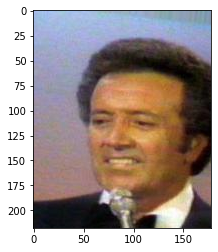

In [64]:
temp = list()
temp.append(image.imread("../img_align_celeba/000321.jpg"))
temp.append(image.imread("../img_align_celeba/001567.jpg"))
temp_test = np.array(temp)
temp_test = temp_test.astype('float32') / 255.
temp_test = temp_test.reshape((len(temp_test), np.prod(temp_test.shape[1:])))
encoded_imgs = encoder.predict(temp_test)
decoded_imgs = decoder.predict(encoded_imgs)
plt.imshow(temp[0])

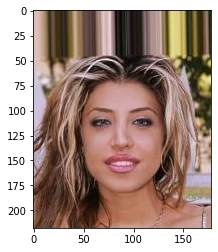

In [65]:
plt.imshow(temp[1])

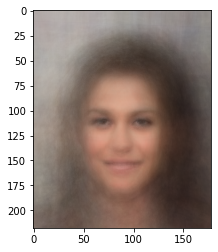

In [66]:
plt.imshow(decoded_imgs[0].reshape(218, 178, 3))

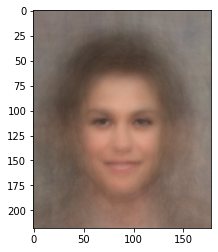

In [67]:
plt.imshow(decoded_imgs[1].reshape(218, 178, 3))